# Rede Neural Artificial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./dados/dados.csv') #Lendo os dados

In [2]:
#Declarando as variáveis:
X = df[['Radiacao (KJ/m²)', 'Temp. Ins. (C)', 'Umi. Ins. (%)', 'Chuva (mm)', 'Hora', 'Mês', 'Pto Orvalho Ins. (C)', 'Temp. Max. (C)',
       'Temp. Min. (C)']]

y = df['Potência CA (W)']


#Separando em treino e teste:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=101) #10% dos dados são p/ teste

## Validação Cruzada

In [30]:
#Criando o modelo:
layers = (50,50,50,50,50) #Criando a tupla das camadas

reg = MLPRegressor(hidden_layer_sizes = layers, activation='relu', solver='lbfgs', learning_rate='adaptive', random_state=101)


#Criando a pipeline do modelo:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), ('modelo', reg)                      
                    ])


#Declarando a Validação Cruzada:
cross_validation = KFold(n_splits=4, shuffle=True, random_state=101)

#Rodando a Validação Cruzada e calculando o RMSE
print('RMSE:', cross_val_score(pipeline, X_t, y_t, cv=cross_validation, scoring='neg_root_mean_squared_error').mean())

RMSE: -313.4789899084973


## Obtendo as métricas para os hiperparâmetros escolhidos

In [29]:
#Separando em treino e validação:
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.3, random_state=101)


#Treinando o modelo:
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_valid)


#Métricas de avalidação
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_valid, pred))
print('R²:', metrics.r2_score(y_valid, pred))

RMSE: 326.52814969540253
MAPE: 1.3275896356563193
R²: 0.8539109500436106


# Prevendo os dados de teste

In [31]:
#Normalizando os dados de entrada:
scaler = StandardScaler()
X_t_scaled = scaler.fit_transform(X_t)
X_test_scaled = scaler.fit_transform(X_test)


#Treinando o modelo:
reg.fit(X_t_scaled, y_t)

#Fazendo a previsão:
pred = reg.predict(X_test_scaled)


#Avaliando o modelo:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, pred))
print('R²:', metrics.r2_score(y_test, pred))

RMSE: 312.15892128355
MAPE: 1.2267358826634924
R²: 0.8630115001325254


<AxesSubplot:xlabel='Valor Real', ylabel='Previsão'>

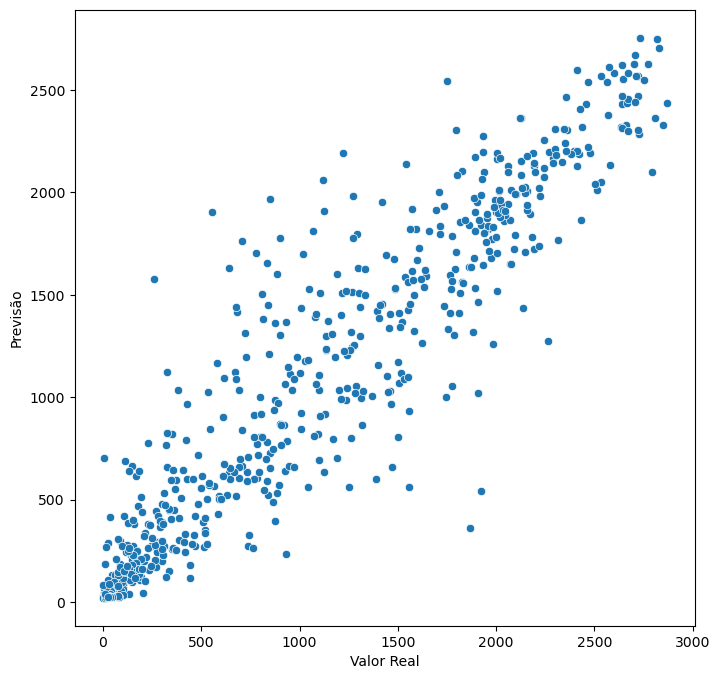

In [32]:
plt.figure(figsize=(8,8))
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
sns.scatterplot(y_test,pred)

In [33]:
pred_table = pd.DataFrame({'Real': y_test, 'Previsto': pred, 'Erro': pred-y_test})

pred_table.head()

,Real,Previsto,Erro
2989,1298.800000,1630.413286,331.613286
3644,2411.333333,2130.768789,-280.564545
3296,2173.416667,1897.049870,-276.366797
96,1222.000000,2190.783679,968.783679
1884,1922.750000,1839.193798,-83.556202


In [35]:
np.sqrt(metrics.mean_squared_error(y_test, pred))/max(y_test)

0.10888631635958958

In [34]:
np.sqrt(metrics.mean_squared_error(y_test, pred))/(df['Potência CA (W)']).mean()

0.28938153693743596